In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import pairwise_distances
import seaborn as sns
seed = 0
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

SEED=123

In [3]:
dff = pd.read_csv('Spotify_5000.csv', index_col=[('name'), ('artist')]) 

In [ ]:
1. SCALING 

In [4]:
df = dff.drop(['id', 'html', 'type', 'duration_ms'], axis=1)

In [39]:
#from sklearn.preprocessing import StandardScaler  # sklearn.cluster.DBSCAN
                                                  # Hierarchical Clustering

In [5]:
from sklearn.preprocessing import StandardScaler
df_pre = StandardScaler().fit_transform(df)  #(feature_range=(0, 1)
df_scal = pd.DataFrame(df_pre, columns=df.columns, index=df.index)
df_scal.max()

danceability         2.098416
energy               1.201618
key                  1.608851
loudness             1.696803
mode                 0.739894
speechiness         11.727268
acousticness         1.983299
instrumentalness     1.963204
liveness             5.365934
valence              1.949608
tempo                3.335065
time_signature       2.610232
dtype: float64

In [57]:
df_scal.sample(19)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
name,artist,,,,,,,,,,,,
Royalty - Live,Tasha Cobbs Leonard,-1.006801,-0.414713,-1.471330,0.415474,0.739894,-0.454838,-0.295106,-0.694283,-0.484308,-0.797974,1.806871,-2.148453
California Dreamin' - Single Version,The Mamas & The Papas,0.217856,0.154125,-1.191314,0.296636,-1.351545,-0.620600,0.511186,-0.694283,-0.859152,0.840492,-0.218528,0.230889
Garota De Ipanema,Leila Pinheiro,1.011360,-1.763967,1.048818,-1.488486,0.739894,-0.452028,1.643365,-0.694246,-0.363823,0.419172,0.634487,0.230889
Anton aus Tirol,Anton,1.080161,1.066345,1.608851,0.620423,-1.351545,-0.201980,-0.700780,-0.694283,4.857217,1.665127,0.570739,0.230889
A Suburb to Hell - 1989 EP Version,Therion,-1.648944,0.778458,-1.191314,0.106303,0.739894,0.250353,-0.814841,1.736576,-0.748707,-0.956420,-0.862131,0.230889
I Refuse - Shock One Remix,Netsky,0.089427,0.514851,1.328835,0.023211,-1.351545,-0.501195,-0.814054,1.714992,1.135553,-0.524296,1.971264,0.230889
Downtown,Petula Clark,-0.066521,-0.085203,-0.351264,0.400540,0.739894,-0.563004,1.137677,-0.694283,-0.142933,0.365157,-0.007226,0.230889
That's Amore,Dean Martin,-0.470154,-1.677254,1.328835,-0.646765,0.739894,-0.689433,1.320286,-0.694283,-0.747368,0.480390,0.186433,0.230889
Heal the World,Michael Jackson,0.162815,-0.584670,1.048818,0.205441,0.739894,-0.487147,0.693795,-0.694278,-0.544551,-1.233699,-1.322333,0.230889


In [7]:
#df_scal.drop(columns=['time_signature', 'song_duration_ms'], axis=1, inplace=True)

In [ ]:
2.Finding numbers of cluster 
   1. Elbow 
   2. Silhouette score

In [26]:
noc = [] 
for i in range(40,100):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(df_scal)
    noc.append(km.inertia_)

/Users/valeriiasatsiuk/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/valeriiasatsiuk/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/valeriiasatsiuk/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/valeriiasatsiuk/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

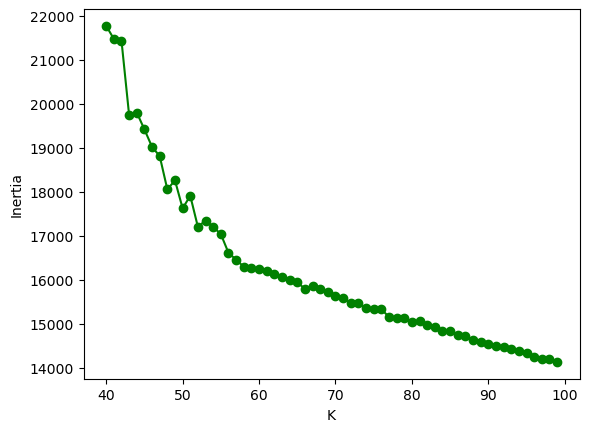

In [27]:
plt.plot(range(40,100), noc, 'og-')
plt.annotate('Elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Inertia");

In [75]:
from sklearn.cluster import DBSCAN

In [ ]:
Silhouette

In [8]:
from sklearn.metrics import silhouette_score

km = KMeans(n_clusters = 20)
km.fit(df_scal)
silhouette_score(df_scal, km.labels_)

/Users/valeriiasatsiuk/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.13384500713605618

In [9]:
silhouette = [] 
for i in range(20,50):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(df_scal)
    silhouette.append(silhouette_score(df_scal, km.labels_))

/Users/valeriiasatsiuk/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/valeriiasatsiuk/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/valeriiasatsiuk/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/valeriiasatsiuk/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

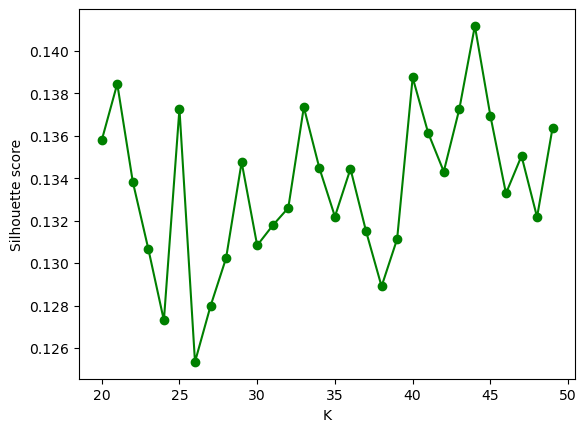

In [64]:
plt.plot(range(20,50), silhouette, 'og-')
plt.annotate('Elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Silhouette score");

In [69]:
#silhouette = [] 
#for i in range(45, 150):
#    km = KMeans(n_clusters= i, random_state=seed)
#    km.fit(df_scal)
#    silhouette.append(silhouette_score(df_scal, km.labels_))

/Users/valeriiasatsiuk/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/valeriiasatsiuk/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/valeriiasatsiuk/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/valeriiasatsiuk/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

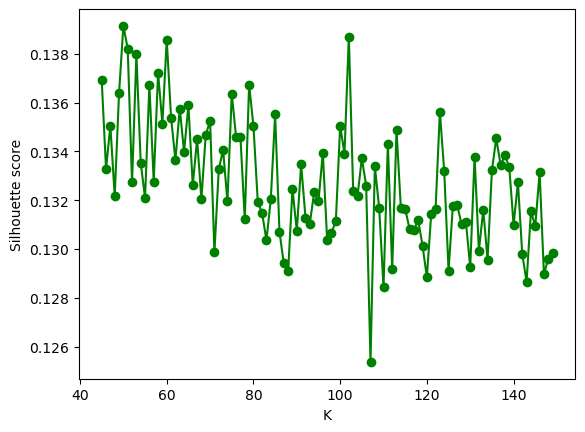

In [70]:
plt.plot(range(45,150), silhouette, 'og-')
plt.annotate('Elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Silhouette score");

In [ ]:
The Hierarchical Clustering (dendrogram)

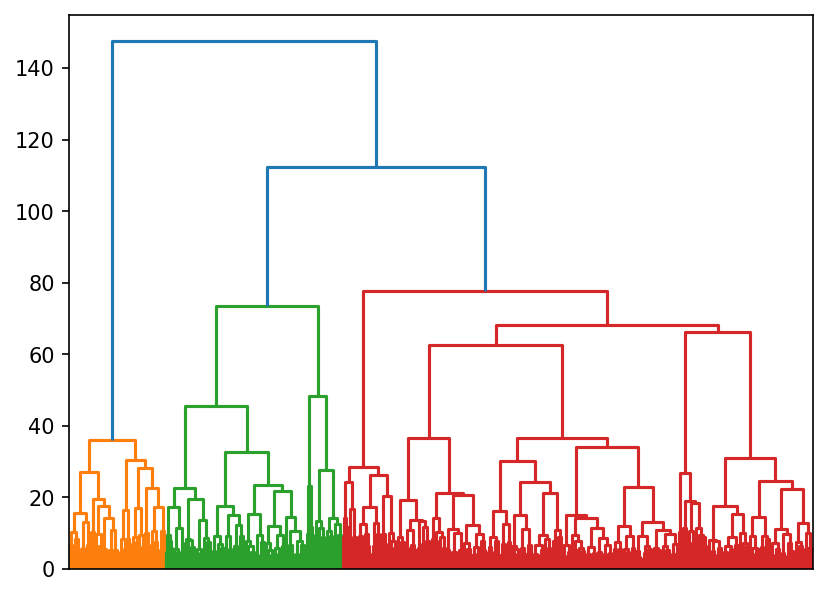

In [14]:
Z = linkage(df_scal,'ward')
plt.figure(dpi=150)
dendrogram(Z, no_labels=True); #leaf_font_size=1.8,

In [ ]:
In this dendrogram we can see that more than 80 clusters don''t have any sense. 

In [ ]:
number of clusters = 50 (first pik)

In [33]:
km = KMeans(n_clusters = 50)
km.fit(df_scal)

/Users/valeriiasatsiuk/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=50)

In [34]:
clusters = km.predict(df_scal)

In [35]:
df_scal['cluster'] = clusters

In [ ]:
2. Plot it using +TSNE+ technique

In [36]:
import numpy as np
from sklearn.manifold import TSNE
#tsne dimen8n.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=50) #(n_components=2, verbose=1, perplexity=40, n_iter=2000)  #(n_components=2, random_state=42, perplexity=50)
df_tsne = tsne.fit_transform(df_scal)
#cl_pos = tsne.fit_transform(centroids)

In [37]:
# Create a NEW DataFrame with the t-SNE results (origonal data)
plot_data = pd.DataFrame(df_tsne, columns=['x', 'y'])
#plot_clpos = pd.DataFrame(cl_pos, columns=['phx','phy'])
plot_data

,x,y
0,21.495697,-20.691210
1,-66.419769,-6.441473
2,-60.672779,-22.154762
3,-6.196514,42.724789
4,-5.351302,41.498329
...,...,...
5230,4.920471,66.383774
5231,4.389399,65.392525
5232,49.721531,34.327805
5233,49.254761,32.829140


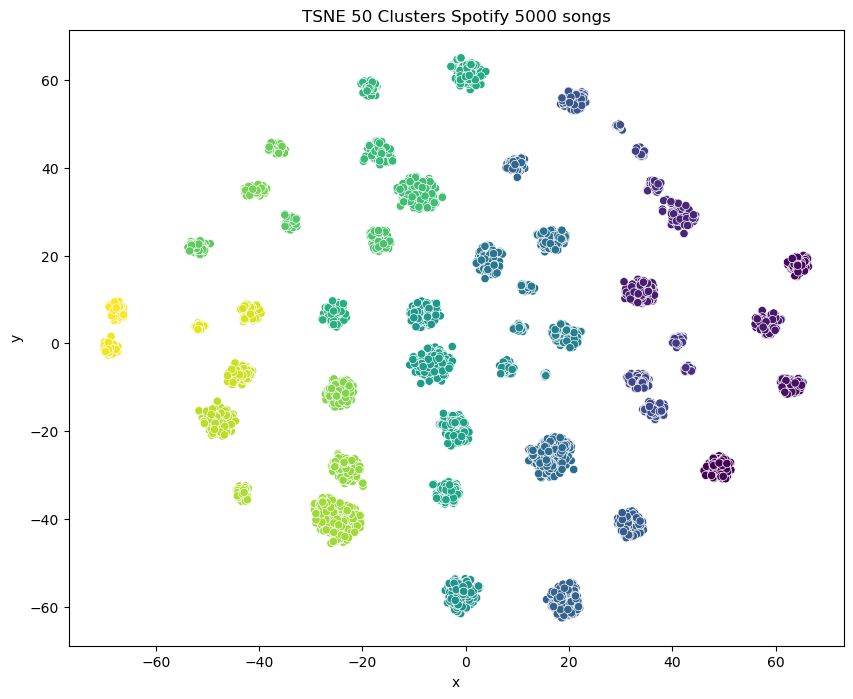

In [80]:
# Plot the data
plt.subplots(figsize=(10,8))
plt.title('TSNE 50 Clusters Spotify 5000 songs')
plt.xlabel('x')
plt.ylabel('y')
sns.scatterplot(data=plot_data, x='x',y='y', c=df_scal['cluster']) #x=plot_data.x,y=plot_data.y, c=df['cluster'])#
#sns.scatterplot(data=plot_clpos, x='phx', y='phy', color='red', s=250)
plt.show()

In [20]:
km = KMeans(n_clusters = 100)
km.fit(df_scal)

/Users/valeriiasatsiuk/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=100)

In [21]:
clusters = km.predict(df_scal)

In [ ]:
df_scal['cluster'] = clusters

In [22]:
#tsne dimensionality reduction before plotting first iteration kmeans
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=50)
df_tsne = tsne.fit_transform(df_scal)
#cl_pos = tsne.fit_transform(centroids)

In [23]:
# Create a new DataFrame with the t-SNE results
plot_data = pd.DataFrame(df_tsne, columns=['x', 'y'])
#plot_clpos = pd.DataFrame(cl_pos, columns=['phx','phy'])
plot_data

,x,y
0,-1.043433,9.160712
1,9.280632,-39.835274
2,9.382862,-24.804268
3,-35.558632,35.068439
4,-34.533768,34.595982
...,...,...
5230,0.467678,59.716488
5231,-0.550713,59.108479
5232,-35.958767,49.970024
5233,-35.454979,48.403774


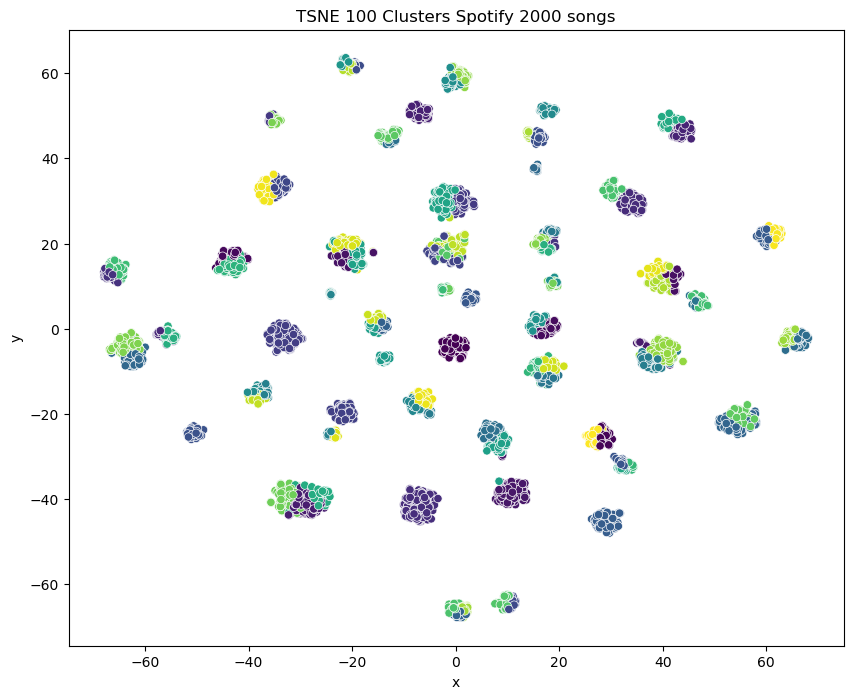

In [24]:
# Plot the data
plt.subplots(figsize=(10,8))
plt.title('TSNE 100 Clusters Spotify 5000 songs')
plt.xlabel('x')
plt.ylabel('y')
sns.scatterplot(data=plot_data, x='x',y='y', c=df['cluster'])
#sns.scatterplot(data=plot_clpos, x='phx', y='phy', color='red', s=250)
plt.show()

In [ ]:
One more experience with 60 Clusters (which we can see on Elbow plot)

In [28]:
km = KMeans(n_clusters = 60)
km.fit(df_scal)

/Users/valeriiasatsiuk/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=60)

In [29]:
clusters = km.predict(df_scal)
df_scal['cluster'] = clusters

In [30]:
#tsne dimensionality reduction before plotting first iteration kmeans
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=50)
df_tsne = tsne.fit_transform(df_scal)
#cl_pos = tsne.fit_transform(centroids)

In [31]:
# Create a new DataFrame with the t-SNE results
plot_data = pd.DataFrame(df_tsne, columns=['x', 'y'])
#plot_clpos = pd.DataFrame(cl_pos, columns=['phx','phy'])
plot_data

,x,y
0,55.547462,-19.532513
1,62.374798,-12.241533
2,-30.236334,-44.204174
3,17.101252,31.023611
4,16.230324,31.534689
...,...,...
5230,-4.009312,67.258240
5231,-3.494473,68.259232
5232,20.661352,56.286327
5233,19.407206,55.138386


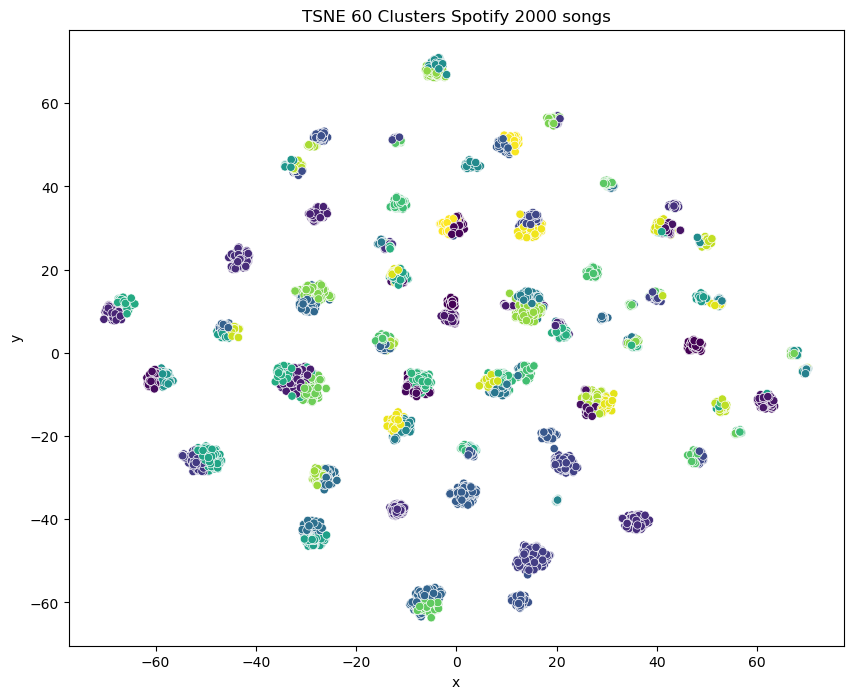

In [32]:
# Plot the data
plt.subplots(figsize=(10,8))
plt.title('TSNE 60 Clusters Spotify 5000 songs')
plt.xlabel('x')
plt.ylabel('y')
sns.scatterplot(data=plot_data, x='x',y='y', c=df['cluster'])
#sns.scatterplot(data=plot_clpos, x='phx', y='phy', color='red', s=250)
plt.show()

In [143]:
#df['cluster'] = km.labels_

In [164]:
#clusters = km.predict(df_scal)

In [ ]:
This experiment with 60 clusters of songs is not so good as previous. 
I choose this option with number of clusters 50.

In [ ]:
Let''s start to analyse clusters

In [94]:
df['clusters'] = clusters

In [95]:
df

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster,clusters
name,artist,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,4,73,42
Saudade De Bahia,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,4,86,5
"Canta Canta, Minha Gente",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,4,26,29
Mulher Eu Sei,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,4,84,44
Rosa Morena,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,4,72,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,4,97,12
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,4,57,3
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,3,28,23


In [96]:
df.groupby('clusters').describe()

danceability                                                        \
                count      mean       std     min      25%     50%      75%   
clusters                                                                      
0               103.0  0.394812  0.147545  0.0807  0.28500  0.4190  0.49300   
1                65.0  0.300966  0.122403  0.0648  0.19800  0.2920  0.39000   
2               193.0  0.602052  0.109975  0.2940  0.53200  0.6040  0.66500   
3                71.0  0.271039  0.123931  0.0643  0.17600  0.2580  0.34400   
4               155.0  0.569052  0.129258  0.1510  0.50100  0.5830  0.64300   
5               232.0  0.730504  0.096513  0.4430  0.67250  0.7405  0.79000   
6                99.0  0.296796  0.088319  0.0798  0.24050  0.2820  0.35100   
7               123.0  0.530008  0.136576  0.2300  0.42800  0.5410  0.63300   
8                34.0  0.605265  0.147153  0.1460  0.51750  0.6505  0.69075   
9                23.0  0.682739  0.087249  0.4840  0.63100  0.6840  0.75300   
10              189.0  0.629735  0.107726  0.2580  0.56500  0.6270  0.70200   
11               83.0  0.654940  0.127960  0.3750  0.57450  0.6590  0.75000   
12               73.0  0.260284  0.130249  0.0644  0.15600  0.2620  0.34900   
13              257.0  0.424078  0.160593  0.1090  0.28400  0.4160  0.54800   
14              169.0  0.763130  0.095152  0.3650  0.70700  0.7690  0.81900   
15               96.0  0.285198  0.122116  0.1240  0.20450  0.2565  0.32925   
16              120.0  0.655500  0.117523  0.3570  0.58425  0.6770  0.74300   
17              170.0  0.747906  0.107929  0.3630  0.67675  0.7550  0.81950   
18              139.0  0.265660  0.096094  0.0911  0.19300  0.2520  0.31600   
19               91.0  0.377040  0.142092  0.0786  0.25950  0.3690  0.47600   
20              140.0  0.256816  0.082217  0.0808  0.20550  0.2455  0.29650   
21              148.0  0.623541  0.108081  0.3570  0.54375  0.6190  0.69025   
22               81.0  0.298620  0.127771  0.0659  0.18800  0.2940  0.40600   
23               48.0  0.281737  0.145404  0.0596  0.13975  0.2565  0.41150   
24               28.0  0.248539  0.136734  0.0000  0.14900  0.2730  0.33050   
25              117.0  0.280248  0.090070  0.1040  0.22500  0.2700  0.31900   
26              252.0  0.731683  0.099482  0.3780  0.66875  0.7400  0.79800   
27               25.0  0.454560  0.131436  0.1810  0.41700  0.4720  0.53000   
28              171.0  0.569614  0.150344  0.1380  0.47050  0.5990  0.67400   
29              137.0  0.776022  0.105494  0.4510  0.71500  0.7920  0.85100   
30               77.0  0.220270  0.074595  0.0879  0.15900  0.2210  0.28400   
31               52.0  0.272242  0.097368  0.0616  0.19425  0.2565  0.34925   
32               66.0  0.602409  0.139487  0.2330  0.50050  0.6115  0.70075   
33               84.0  0.245457  0.108590  0.0768  0.17325  0.2225  0.28250   
34               25.0  0.339940  0.167022  0.0795  0.21700  0.3090  0.40300   
35              122.0  0.488803  0.135155  0.1490  0.40875  0.4995  0.58850   
36               65.0  0.465185  0.173542  0.1790  0.31000  0.5170  0.58800   
37              111.0  0.616324  0.116114  0.2430  0.54450  0.6080  0.70150   
38               95.0  0.754926  0.119979  0.4210  0.67600  0.7770  0.84300   
39               44.0  0.277466  0.142330  0.0651  0.16225  0.2500  0.38775   
40              128.0  0.644648  0.115832  0.3530  0.56100  0.6480  0.73450   
41              114.0  0.265163  0.099179  0.0747  0.20025  0.2530  0.30750   
42               44.0  0.459325  0.162337  0.0683  0.32750  0.5075  0.57075   
43               67.0  0.600060  0.145641  0.2260  0.50200  0.6220  0.72300   
44              129.0  0.606457  0.122185  0.3460  0.51200  0.5970  0.69700   
45               38.0  0.265816  0.128539  0.1200  0.19225  0.2415  0.29075   
46               69.0  0.276255  0.142938  0.0619  0.15700  0.2810  0.38100   
47               96.0  0.265937  0.103080  0.1230  0.19150 

In [ ]:
My_clusters 5 

In [61]:
df.loc[df['cluster']==46].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
count,49.000000,49.000000,49.000000,49.000000,49.0,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.0
mean,0.603306,0.507878,8.367347,-10.214959,1.0,0.047622,0.561694,0.013685,0.127610,0.729204,89.148612,3.979592,46.0
std,0.100545,0.134282,1.740377,3.359241,0.0,0.031322,0.213421,0.039665,0.053207,0.152958,8.637849,0.142857,0.0
min,0.394000,0.258000,4.000000,-18.064000,1.0,0.024800,0.146000,0.000000,0.039200,0.452000,62.658000,3.000000,46.0
25%,0.543000,0.410000,7.000000,-12.162000,1.0,0.031200,0.365000,0.000000,0.097400,0.629000,83.755000,4.000000,46.0
50%,0.610000,0.488000,9.000000,-10.070000,1.0,0.035000,0.574000,0.000061,0.113000,0.732000,90.543000,4.000000,46.0
75%,0.666000,0.609000,9.000000,-7.518000,1.0,0.054600,0.776000,0.004260,0.155000,0.831000,94.934000,4.000000,46.0
max,0.814000,0.873000,11.000000,-3.834000,1.0,0.190000,0.881000,0.244000,0.316000,0.969000,111.166000,4.000000,46.0


In [67]:
df.loc[df['cluster']==46].head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
name,artist,,,,,,,,,,,,,
Team Zissou,Seu Jorge,0.619,0.402,7,-11.559,1,0.0354,0.870,0.070200,0.0974,0.792,93.237,4,46
Once Again,Stan Getz,0.623,0.331,8,-14.346,1,0.0372,0.846,0.078100,0.0780,0.583,90.439,4,46
Orange Afternoon,Bebe,0.615,0.630,10,-10.809,1,0.0448,0.430,0.244000,0.1130,0.557,91.122,4,46
Seja Agora,Deolinda,0.665,0.783,11,-6.046,1,0.0830,0.832,0.000000,0.0862,0.831,98.179,4,46
Brasil Pandeiro,Novos Baianos,0.549,0.555,11,-7.144,1,0.0344,0.791,0.000311,0.1170,0.876,97.724,4,46


In [ ]:
Cluster number 46 is cluster which contains:
    
    - the high score of: danceability, valence.
        
    
    - the moderate score of: energy, acousticness,  tempo.
        
    
    - the low score of: loudness, instrumentalness.
    
Brazilian LifeStory. 


In [62]:
df.loc[df['cluster']==47].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.0,55.0
mean,0.398491,0.214304,5.345455,-14.800582,0.727273,0.039251,0.874564,0.051314,0.172051,0.277975,98.756618,3.0,47.0
std,0.145246,0.119730,3.405976,4.342078,0.449467,0.009391,0.151281,0.146769,0.107191,0.181514,20.962778,0.0,0.0
min,0.131000,0.021000,0.000000,-24.792000,0.000000,0.024300,0.199000,0.000000,0.070600,0.034300,62.140000,3.0,47.0
25%,0.282000,0.134500,2.500000,-17.465000,0.000000,0.031250,0.862000,0.000007,0.098900,0.154000,83.462500,3.0,47.0
50%,0.382000,0.197000,5.000000,-14.067000,1.000000,0.038400,0.920000,0.000902,0.119000,0.231000,94.872000,3.0,47.0
75%,0.518000,0.276000,8.500000,-11.882500,1.000000,0.043400,0.963500,0.015200,0.209000,0.383000,110.966000,3.0,47.0
max,0.738000,0.556000,11.000000,-7.239000,1.000000,0.068000,0.989000,0.899000,0.441000,0.773000,147.117000,3.0,47.0


In [69]:
df.loc[df['cluster']==47].head(10)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
name,artist,,,,,,,,,,,,,
Não Sei,Sílvia Pérez Cruz,0.382,0.0866,1,-14.067,0,0.0396,0.978,0.001970,0.2340,0.157,111.042,3,47
Fotografia,João Gilberto,0.437,0.1970,4,-17.950,1,0.0433,0.958,0.000038,0.1720,0.542,133.717,3,47
Warm Shadow,Fink,0.738,0.5560,4,-11.505,0,0.0396,0.635,0.246000,0.1120,0.286,100.522,3,47
Alfonsina Y El Mar,Mercedes Sosa,0.514,0.1240,10,-14.035,0,0.0391,0.964,0.000060,0.0862,0.227,132.935,3,47
Tell Me Now So I Know,Holly Golightly,0.522,0.1730,9,-13.081,0,0.0421,0.900,0.034800,0.1000,0.197,134.452,3,47
Aquellos Ojos,Mujeres,0.492,0.4510,7,-8.135,1,0.0339,0.545,0.000181,0.3540,0.486,77.820,3,47
I Can't Stop Loving You,Ray Charles,0.310,0.2790,5,-13.552,1,0.0308,0.815,0.000000,0.3180,0.377,79.397,3,47
Unforgettable,Nat King Cole,0.349,0.1820,5,-13.507,1,0.0310,0.920,0.015200,0.1430,0.178,136.094,3,47
Tennessee Waltz,Patti Page,0.468,0.1710,5,-10.905,1,0.0303,0.957,0.000037,0.1420,0.357,86.525,3,47


In [ ]:
Cluster number 47 is cluster which contains:
    
    - the high score of: acousticnes, instrumentalness.
        
    
    - the moderate score of: danceability, tempo.
        
    
    - the low score of: energy, loudness, valence.
    
Brazilian Lyric (old days)

In [63]:
df.loc[df['cluster']==48].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
count,21.000000,21.000000,21.000000,21.000000,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,0.323762,0.844095,9.000000,-9.338905,0.0,0.068152,0.007218,0.850048,0.109252,0.350857,132.146810,4.047619,48.0
std,0.121183,0.121960,1.870829,2.682257,0.0,0.023058,0.022179,0.123086,0.033371,0.138511,9.148528,0.218218,0.0
min,0.168000,0.512000,5.000000,-14.603000,0.0,0.032200,0.000001,0.559000,0.054400,0.063000,115.760000,4.000000,48.0
25%,0.247000,0.777000,8.000000,-11.100000,0.0,0.046700,0.000002,0.799000,0.087200,0.267000,126.570000,4.000000,48.0
50%,0.308000,0.863000,10.000000,-9.438000,0.0,0.072700,0.000029,0.901000,0.103000,0.343000,130.163000,4.000000,48.0
75%,0.358000,0.948000,11.000000,-7.766000,0.0,0.080900,0.000391,0.939000,0.124000,0.406000,137.681000,4.000000,48.0
max,0.641000,0.992000,11.000000,-2.237000,0.0,0.112000,0.084000,0.948000,0.200000,0.631000,151.122000,5.000000,48.0


In [70]:
df.loc[df['cluster']==48].head(10)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
name,artist,,,,,,,,,,,,,
Cari,Senior i el cor brutal,0.641,0.512,10,-9.438,0,0.0425,0.084000,0.914,0.1100,0.629,126.570,4,48
Midnight City - Eric Prydz Private Remix,M83,0.541,0.854,11,-7.540,0,0.0599,0.001450,0.695,0.1290,0.351,125.021,4,48
Crowd Control - Radio Edit,Dimitri Vegas & Like Mike,0.540,0.953,11,-2.237,0,0.0809,0.062200,0.658,0.1320,0.124,139.902,4,48
Butchered at Birth,Cannibal Corpse,0.339,0.980,10,-7.994,0,0.0934,0.000251,0.936,0.0803,0.439,146.651,4,48
Gutted,Cannibal Corpse,0.358,0.977,8,-8.179,0,0.0727,0.000082,0.924,0.1030,0.449,137.681,4,48
Into Hiding,Amorphis,0.249,0.755,8,-9.505,0,0.0381,0.000002,0.939,0.0544,0.244,129.394,4,48
Thrones of Blood,Suffocation,0.308,0.879,8,-10.638,0,0.0874,0.000002,0.926,0.1150,0.631,137.012,4,48
A Bolt of Blazing Gold,Dark Tranquillity,0.312,0.873,6,-7.247,0,0.0455,0.001010,0.781,0.1240,0.391,129.521,4,48
Tales...,Edge Of Sanity,0.304,0.684,11,-14.603,0,0.0467,0.000022,0.941,0.1210,0.253,130.163,4,48


In [ ]:
Cluster number 48 is cluster which contains:
    
    - the high score of: energy, instrumentalness, tempo.
        
    
    - the moderate score of: danceability, loudness, valence.
        
    
    - the low score of: acousticness.
    
Hard Metal
Trip to the Hell

In [64]:
df.loc[df['cluster']==49].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
count,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0
mean,0.268272,0.153031,7.680000,-19.070040,1.0,0.044570,0.933260,0.869340,0.129620,0.136248,82.585260,4.020000,49.0
std,0.124453,0.116887,1.889174,4.165606,0.0,0.014002,0.076566,0.103121,0.060516,0.134113,12.663186,0.141421,0.0
min,0.064300,0.006920,4.000000,-27.041000,1.0,0.030400,0.654000,0.426000,0.069400,0.028300,62.422000,4.000000,49.0
25%,0.166250,0.070475,7.000000,-22.143750,1.0,0.038025,0.918750,0.845750,0.097325,0.039550,73.738500,4.000000,49.0
50%,0.256000,0.125500,8.000000,-19.307500,1.0,0.041250,0.960500,0.902000,0.111500,0.090750,79.670500,4.000000,49.0
75%,0.346000,0.228000,9.000000,-16.626500,1.0,0.044875,0.987750,0.929750,0.127750,0.179500,89.640750,4.000000,49.0
max,0.568000,0.568000,11.000000,-8.916000,1.0,0.103000,0.995000,0.961000,0.327000,0.687000,112.848000,5.000000,49.0


In [74]:
df.loc[df['cluster']==49].sample(10)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
name,artist,,,,,,,,,,,,,
"Tannhäuser, WWV 70: Lied an den Abendstern (Arr. for Cello and Piano)",Richard Wagner,0.1440,0.0687,7,-23.785,1,0.0480,0.985,0.916,0.0995,0.0359,82.477,4,49
Andromeda,Applefish,0.2140,0.1580,8,-19.160,1,0.0431,0.949,0.925,0.1120,0.0365,71.436,4,49
You Say,The Piano Guys,0.2720,0.3230,10,-12.932,1,0.0339,0.964,0.796,0.1190,0.0537,73.845,4,49
Heather,Eusebius,0.3510,0.1280,9,-16.679,1,0.0436,0.979,0.896,0.1090,0.1850,70.396,4,49
"Symphony No. 1 in A Flat Major, Op. 55: 1. Andante. Nobilmente e semplice - Allegro",Edward Elgar,0.0938,0.1160,8,-19.970,1,0.0385,0.960,0.868,0.1200,0.0562,80.820,5,49
May it Be,2CELLOS,0.1700,0.2740,7,-14.759,1,0.0460,0.924,0.882,0.1130,0.0394,78.858,4,49
"Finlandia, Op.26",Jean Sibelius,0.2400,0.2610,8,-17.065,1,0.0394,0.918,0.883,0.1200,0.0566,71.775,4,49
"Elgar: Enigma Variations, Op. 36: XV. EDU (Finale)",Edward Elgar,0.1460,0.2530,7,-18.408,1,0.0398,0.884,0.896,0.0973,0.1360,80.359,4,49
"Scheherazade, Op.35: The Sea and Sinbad's Ship",Nikolai Rimsky-Korsakov,0.1520,0.1810,4,-12.103,1,0.0388,0.932,0.843,0.2200,0.0360,96.681,4,49


In [ ]:
Cluster number 49 is cluster which contains:
    
    - the high score of: acousticness, instrumentalness.
        
    
    - the moderate score of: -----
        
    
    - the low score of: danceability, energy, loudness, valence, tempo.
    
Emotional instrumental 

In [65]:
df.loc[df['cluster']==50].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0
mean,0.298143,0.968429,5.571429,-5.364714,0.142857,0.350857,0.006922,0.326651,0.179371,0.059443,131.104571,3.857143,50.0
std,0.158462,0.044049,0.534522,1.963151,0.377964,0.057115,0.011364,0.411047,0.103684,0.029703,28.530086,0.377964,0.0
min,0.120000,0.896000,5.000000,-8.946000,0.000000,0.297000,0.000047,0.002500,0.080000,0.031900,95.693000,3.000000,50.0
25%,0.179000,0.952000,5.000000,-6.192000,0.000000,0.309000,0.000161,0.011030,0.094800,0.037000,112.543500,4.000000,50.0
50%,0.310000,0.991000,6.000000,-4.970000,0.000000,0.336000,0.000572,0.085000,0.121000,0.039500,125.744000,4.000000,50.0
75%,0.356500,0.995000,6.000000,-3.950500,0.000000,0.372500,0.008155,0.614000,0.278000,0.083850,146.007500,4.000000,50.0
max,0.586000,0.998000,6.000000,-3.352000,1.000000,0.460000,0.031200,0.949000,0.309000,0.103000,179.193000,4.000000,50.0


In [73]:
df.loc[df['cluster']==50].head(10)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
name,artist,,,,,,,,,,,,,
South Of Heaven,Slayer,0.310,0.991,5,-3.769,0,0.316,0.000132,0.08500,0.0969,0.0395,140.071,4,50
Drop That Low (When I Dip),Tujamo,0.586,0.896,5,-4.132,0,0.372,0.009450,0.83600,0.1210,0.1030,125.744,4,50
Troops of Doom,Sepultura,0.372,0.998,6,-4.970,0,0.302,0.031200,0.01500,0.0927,0.0354,106.029,4,50
Black Vision,Purtenance,0.168,0.991,6,-6.765,1,0.460,0.006860,0.39200,0.2960,0.0386,179.193,3,50
Nervegasclouds,Vomitory,0.120,0.998,6,-3.352,0,0.336,0.000047,0.00250,0.2600,0.0319,95.693,4,50
Creative Killings,Sinister,0.190,0.992,6,-5.619,0,0.297,0.000190,0.94900,0.3090,0.0796,151.944,4,50
The Solitude,Cenotaph,0.341,0.913,5,-8.946,0,0.373,0.000572,0.00706,0.0800,0.0881,119.058,4,50


In [ ]:
Cluster number 50 is cluster which contains:
    
    - the high score of: danceability, tempo.
        
    
    - the moderate score of: danceability, loudness, instrumentalness.
        
    
    - the low score of: acousticness, valence.
    
Sinister
....

In [59]:
df.to_csv('50_CLusters_Spotify.csv')